In [108]:
import numpy as np
import matplotlib.pyplot as plt
from modusa.tools.plotter import Plotter
import librosa

In [139]:
T = 0.00001 # Sampling period (1 ms)
dur = 0.5 # sec
t = np.arange(T, dur, T)
y = np.sin(2*np.pi*(1/t)) # Freq = 1/t^2
sr = 1/T

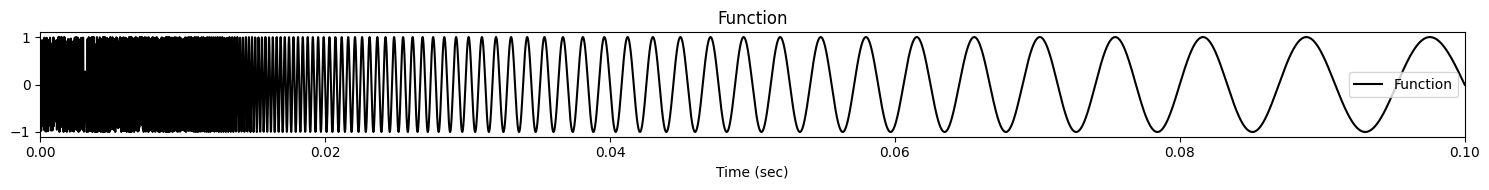

In [140]:
Plotter.plot_signal(y=y, x=t, xlabel="Time (sec)", xlim=(0, 0.1), title="Function")

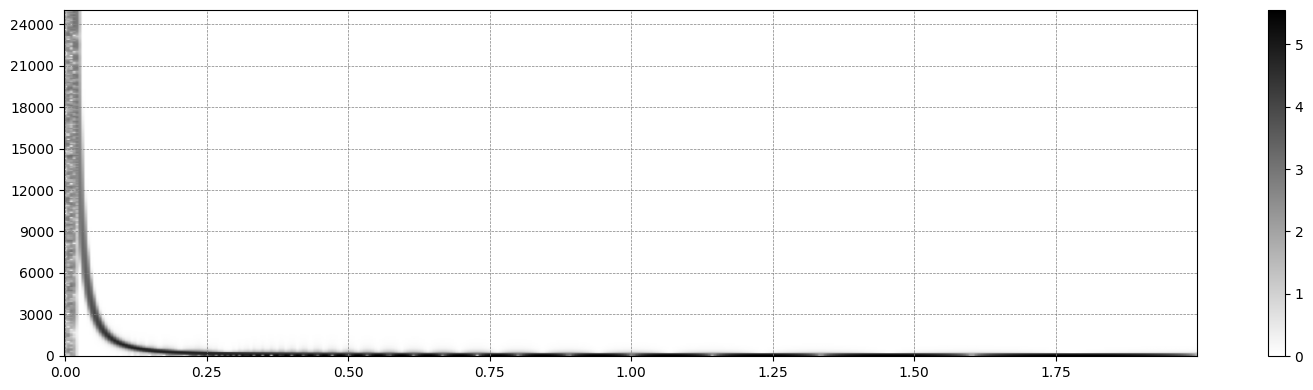

In [141]:
N, H = 1024, 512
S = librosa.stft(y=y, n_fft=512)
S = np.abs(S)
S = np.log(1 + S)
t = np.arange(S.shape[1]) * (H/sr)
f = np.arange(S.shape[0]) * (sr/N)
Plotter.plot_matrix(M=S, r=f, c=t)

In [142]:
X = np.fft.fft(y)
len_X = len(X)
X = X[len_X//2+1:]
freq = np.fft.fftfreq(n=y.shape[0], d=T)
freq = freq[:len_X//2]

In [143]:
freq

array([0.00000000e+00, 2.00004000e+00, 4.00008000e+00, ...,
       4.99929999e+04, 4.99949999e+04, 4.99969999e+04], shape=(24999,))

In [144]:
X.shape, freq.shape

((24999,), (24999,))

In [145]:
freq.shape, X.shape

((24999,), (24999,))

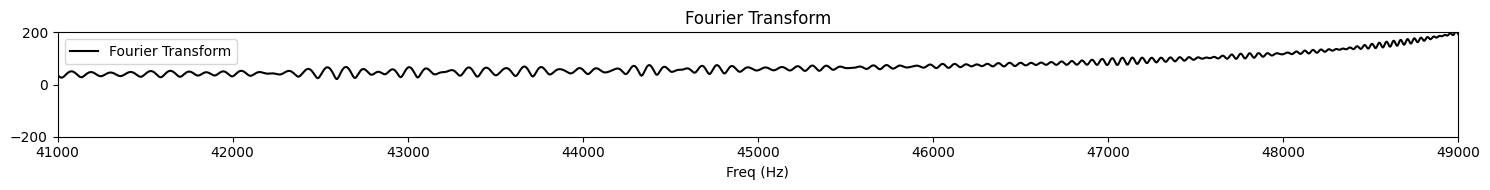

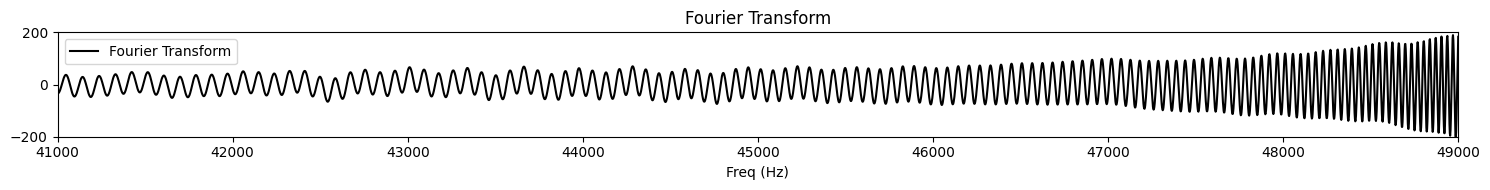

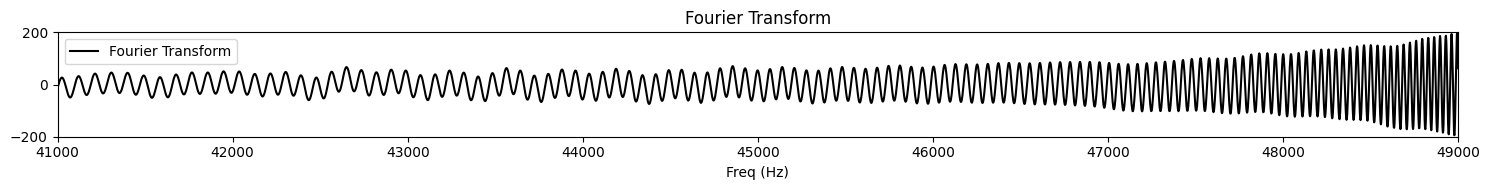

In [154]:
display(Plotter.plot_signal(y=np.abs(X), x=freq, xlabel="Freq (Hz)", xlim=(41000, 49000), ylim=(-200, 200), title="Fourier Transform"))
display(Plotter.plot_signal(y=np.real(X), x=freq, xlabel="Freq (Hz)", xlim=(41000, 49000), ylim=(-200, 200), title="Fourier Transform"))
display(Plotter.plot_signal(y=np.imag(X), x=freq, xlabel="Freq (Hz)", xlim=(41000, 49000), ylim=(-200, 200), title="Fourier Transform"))


In [156]:
y=np.real(X)
x = freq # Resolution

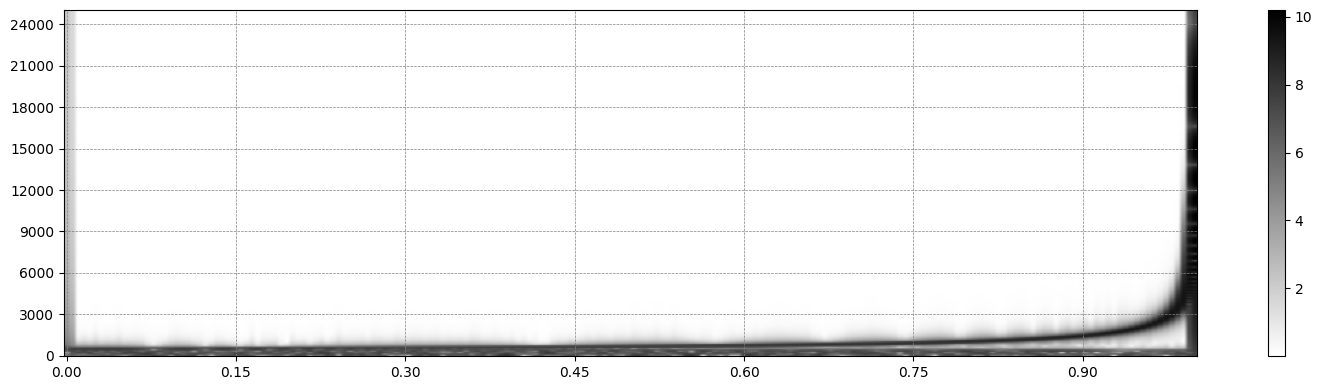

In [159]:
N, H = 1024, 512
X = librosa.stft(y=y, n_fft=512)
X = np.abs(X)
X = np.log(1 + X)
t = np.arange(X.shape[1]) * (H/sr)
f = np.arange(X.shape[0]) * (sr/N)
Plotter.plot_matrix(M=X, r=f, c=t)

In [92]:
Xprime = np.fft.fft(np.real(X))
freq_prime = np.fft.fftfreq(n=X.shape[0], d=freq[1] - freq[0])

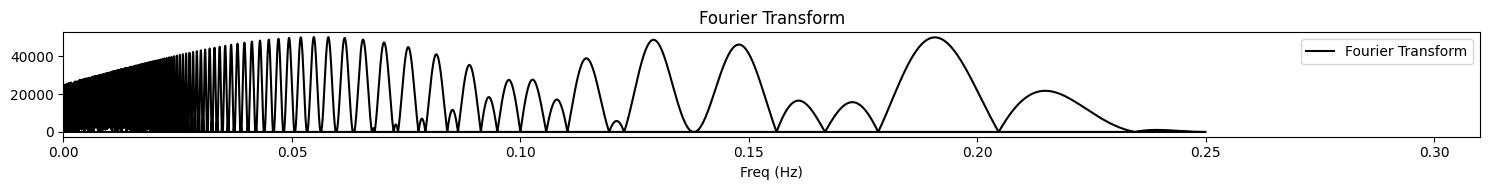

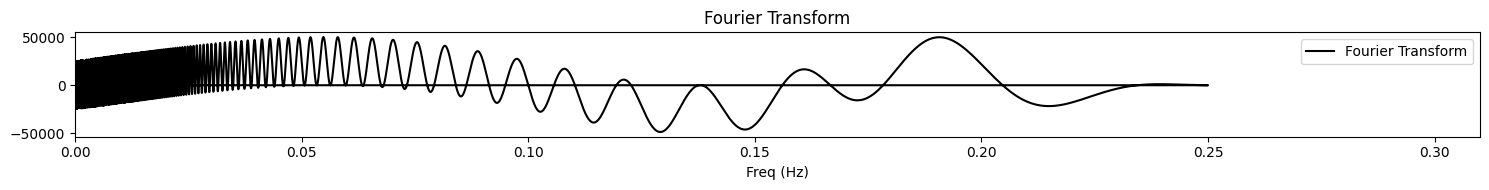

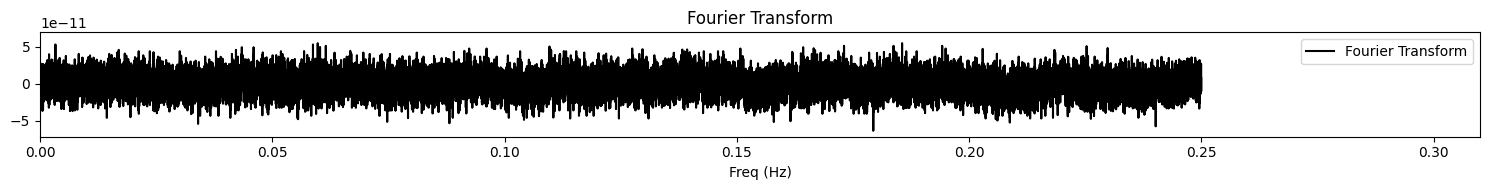

In [93]:
display(Plotter.plot_signal(y=np.abs(Xprime), x=freq_prime, xlabel="Freq (Hz)", xlim=(0, 0.31), title="Fourier Transform"))
display(Plotter.plot_signal(y=np.real(Xprime), x=freq_prime, xlabel="Freq (Hz)", xlim=(0, 0.31), title="Fourier Transform"))
display(Plotter.plot_signal(y=np.imag(Xprime), x=freq_prime, xlabel="Freq (Hz)", xlim=(0, 0.31), title="Fourier Transform"))

In [58]:
Xprime

array([-3.39599228e-06+3.63797881e-12j,  6.28318439e+00+5.38446430e-12j,
        2.16627687e+04-4.94715380e-12j, ...,
        1.88503077e+01+1.47232018e-11j,  2.16627687e+04+6.39666098e-12j,
        6.28318439e+00-2.37199897e-11j], shape=(49999,))

In [60]:
freq_prime

array([ 0.e+00,  1.e-05,  2.e-05, ..., -3.e-05, -2.e-05, -1.e-05],
      shape=(49999,))

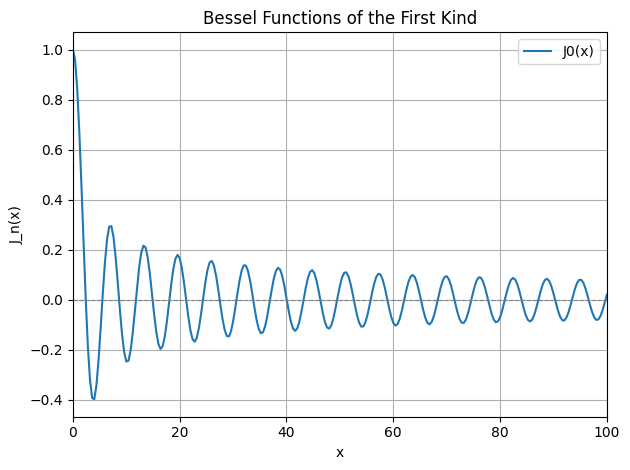

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn  # Bessel function of the first kind

# Define x values
x = np.linspace(0, 2000, 5000)

# Plot Bessel functions of different orders
orders = [0]
for n in orders:
    y = jn(n, x)
    plt.plot(x, y, label=f"J{n}(x)")

# Formatting
plt.title("Bessel Functions of the First Kind")
plt.xlabel("x")
plt.ylabel("J_n(x)")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.xlim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [169]:
from scipy.special import factorial

$\sum_N y^{N-1} / N!(N-1)!$

In [195]:
Ns = np.arange(1, 50)
y = np.arange(0, 10000, 0.1)



In [196]:
k = np.zeros(len(y))
for N in Ns:
    # num
    num = np.pow(y, N - 1)
    # dem
    den = factorial(N) * factorial(N-1)
    k += np.array(num / den)
    print(k)
    if N == 2:
        break

[1. 1. 1. ... 1. 1. 1.]
[1.00000e+00 1.05000e+00 1.10000e+00 ... 5.00085e+03 5.00090e+03
 5.00095e+03]


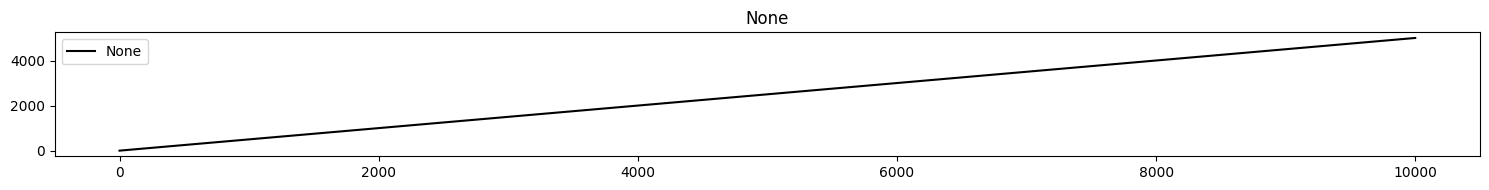

In [197]:
Plotter.plot_signal(y=k, x=y, title="None")

In [188]:
factorial(6)

np.float64(720.0)